In [1]:
import nltk

In [ ]:
# nltk.download()

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Santosh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

# tokenize example

In [4]:
from nltk.tokenize import word_tokenize
input_text='I am learning NLP usink nltk'
word_token=word_tokenize(input_text)
print(input_text)
print(word_token)

I am learning NLP usink nltk
['I', 'am', 'learning', 'NLP', 'usink', 'nltk']


# Reading a Text Data

## Method 1: Using open()
## Method 2: pandas read_csv()

In [5]:
# Method 1: Using open()
raw_data=open("SMSSpamCollection").read()

In [6]:
raw_data[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [7]:
parsed_data=raw_data.replace('\t', '\n').split('\n')
parsed_data[0:10]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though"]

In [8]:
label_list=parsed_data[0::2]
msg_list=parsed_data[1::2]
print(label_list[0:5])
print(msg_list[0:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


In [9]:
print(len(label_list))
print(len(msg_list))

5575
5574


In [10]:
print(msg_list[-3:])
print(label_list[-3:])

['Pity, * was in mood for that. So...any other suggestions?', "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free", 'Rofl. Its true to its name']
['ham', 'ham', '']


In [11]:
import pandas as pd
combined_df=pd.DataFrame({'label':label_list[:-1],'sms':msg_list})
combined_df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Method 2: pandas read_csv

In [12]:
# Method 2: pandas read_csv
dataset=pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=['label', 'sms'])

In [13]:
dataset.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploring the data

In [14]:
# Shape of the dataset
dataset.shape

(5572, 2)

In [15]:
# Number of labeles: ham and spam, in ratio
#count
print('\n count:', '\n',dataset.label.value_counts())
print('\n')
#ratio
print('ratio : ', '\n',dataset.label.value_counts()/dataset.shape[0])


 count: 
 ham     4825
spam     747
Name: label, dtype: int64


ratio :  
 ham     0.865937
spam    0.134063
Name: label, dtype: float64


In [16]:
# Number of missing values
dataset.apply(lambda x: x.isnull().sum())

label    0
sms      0
dtype: int64

# NLP Pipeline

### Raw Data===> Tokenization ===> Text Cleaning ===> Vectorization===> ML ALgorithm ===> Evaluate Model ==> Deploy

# Text Preprocessing: Tokenization + Text Cleaning 
* Remove Punctuation
* Tokenization
* Remove Stop words
* Stemming

## Remove Punctuation

In [18]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
data=pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'msg'])
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def remove_punctuation(txt):
    tex_nopunct=''.join([c for c in txt if c not in string.punctuation])
    return tex_nopunct

In [24]:
data['msg_clean']=data['msg'].apply(lambda x: remove_punctuation(x))
data.head()

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


# Tokenization

* re.split(w)==> split on word characters

* re.split(W)==> split on non word characters

* re.split(W+)==> split on one or more non word characters

In [25]:
import re

def tokenize(txt):
    
    tokens=re.split('\W+', txt)
    return tokens

In [27]:
data['msg_clean_tokens']=data['msg_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,label,msg,msg_clean,msg_clean_tokens
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


# Removing Stop Words

In [34]:
import nltk
stopwords=nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [35]:
def remove_stopwords(txt):
    
    txt_clean=[c for c in txt if c not in stopwords]
    return txt_clean

In [38]:
data['msg_no_stop']=data['msg_clean_tokens'].apply(lambda x: remove_stopwords(x))
data.head()

,label,msg,msg_clean,msg_clean_tokens,msg_no_stop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


# Stemming
* Process of reducing derived words to their root word
* Eg: coder, coding, coded===> Code (root word)

## Errors in Stemming

1. Over Stemming
    * too much of word is cut off(meaning is lost)
    * 2 words of different stem reduced to same stem
        
2. Under Stemming
    * 2 words of same stem mapped to different stems

### why is stemming useful
* Reduces the corpus of words the model needs to work with
* Explicitly correlates the words with similar meaning

### Stemming algorithms
1. Porter Stemmer-------> more popular
2. Snowball Stemmer
3. Lancaster Stemmer
4. Regex-based Stemmer

# Porter Stemmer

In [40]:
import nltk
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [41]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

* we are interested in ps.stem

In [42]:
print(ps.stem('coder'))
print(ps.stem('coded'))
print(ps.stem('coding'))
print(ps.stem('code'))

coder
code
code
code


In [43]:
print(ps.stem('data'))
print(ps.stem('datum'))

data
datum


* ==> data and datum are same with meaning ==> under stemming


In [44]:
## SMSspam Cleaning== > all in one

In [45]:
import nltk
import string
import re

stopwords=nltk.corpus.stopwords.words('english')
pd.set_option('display.max_colwidth', 100)

In [47]:
data=pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'msg'])
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# Clean Text

In [52]:
def clean_text(txt):
    text=''.join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+', text)
    text_nostop=[c for c in tokens if c not in stopwords]
    return text_nostop

In [54]:
data['msg_nostop']=data['msg'].apply(lambda x: clean_text(x.lower()))
data.head()

,label,msg,msg_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


# Stem the Text

In [55]:
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

In [56]:
data['msg_stemmed']=data['msg_nostop'].apply(lambda x: stemming(x))
data.head()

,label,msg,msg_nostop,msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


# Lemmatization

* Process of grouping together the inflected forms of a word to be analyzed as a single root word or lemma
* Unlike Stemming it reduces the inflected(derived) words properly ensuring that the root word(lemma) belongs to the language
* A lemma is the canonical form, dictionary form or citation form of a set of words
* Eg: bowl, bowled, bowling------> bowl(lemma, root word)
* does vocabulary analysis of words
* Slower than stemming but it is more accurate

## Lemmatization vs Stemming

* speed vs accuracy tradeoff

#### Stemming: is typically faster
    * simply chops off the end of a word using heuristics
    * no understtanding of the context
    
#### Lemmatization: is typically more accurate
    * Uses more informed analysis
    * Always Reduces to a dictionary word
    * More Acurate but computationally expensive

In [75]:
import nltk
nltk.download('wordnet')
wn=nltk.WordNetLemmatizer()
ps=PorterStemmer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Santosh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [76]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

* we are interested in wn.lemmatize() function

In [77]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [78]:
wn=nltk.WordNetLemmatizer()
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


In [80]:
print(ps.stem('cactus'))
print(ps.stem('cacti'))

cactu
cacti


In [79]:
print(wn.lemmatize('cactus'))
print(wn.lemmatize('cacti'))

cactus
cactus


### Read Raw Text

In [86]:
import nltk
import re
import pandas as pd
import string
stopwords=nltk.corpus.stopwords.words('english')

pd.set_option('display.max_colwidth', 100)
data=pd.read_csv('SMSSpamCollection', sep='\t',header=None, names=['label', 'msg'])
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [89]:
### text cleaning
def clean_text(txt):
    text=''.join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+', text)
    text_nostop=[c for c in tokens if c not in stopwords]
    return text_nostop

In [91]:
data['msg_nostop']=data['msg'].apply(lambda x: clean_text(x.lower()))
data.head()

,label,msg,msg_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


In [95]:
def lemmatization(token_text):
    text=[wn.lemmatize(word) for word in token_text]
    return text

In [96]:
data['msg_lemmatized']=data['msg_nostop'].apply(lambda x: lemmatization(x))
data.head()

,label,msg,msg_nostop,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"


# Vectorization

* Process of encoding text as Feature Vectors
* <b>Feature Vector</b> : Vector of numerical features that represent an object

* Example of How CountVectorizer Works
  * w1  w2  w3 ...... w100 | label
  * 0   0    2 ......  3   |   0(ham)
  * 4   0    1 ......  0   |  1(spam)
  
* ==> this is <b> Document Matrix </b> or Document term matrix

## Types of Vectorization
* Count Vectorization
* N-grams
* TF-IDF

## Count Vectorization 

* creates document term matrix

#### from sklearn.feature_extraction.text import CountVectorizer
#### cv=CountVectorizer(analyzer=<text_cleaning fn>)

# Read Raw Text

In [106]:
import pandas as pd
import re
import string
import nltk

stopwords=nltk.corpus.stopwords.words('english')
ps=PorterStemmer()

data=pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=['label', 'msg'])
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# Clean Text

In [120]:
def clean_text(txt):
    text=''.join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+', text)
    txt_nostop=[ps.stem(word) for word in tokens if word not in stopwords]
    return txt_nostop

### CountVectorizer Example

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

corpus=['This is a sentence is',
       'this is another sentence',
       'third document is here']

X=cv.fit(corpus)
print(X.vocabulary_)
print(cv.get_feature_names())

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']


In [113]:
X=cv.transform(corpus)

print('X shape :', X.shape)
print('\n')
print('X:',X)
print('\n')

print(X.toarray())

X shape : (3, 7)


X:   (0, 3)	2
  (0, 4)	1
  (0, 6)	1
  (1, 0)	1
  (1, 3)	1
  (1, 4)	1
  (1, 6)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1


[[0 0 0 2 1 0 1]
 [1 0 0 1 1 0 1]
 [0 1 1 1 0 1 0]]


In [117]:
df=pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df

,another,document,here,is,sentence,third,this
0,0,0,0,2,1,0,1
1,1,0,0,1,1,0,1
2,0,1,1,1,0,1,0


### CountVectorization on SMSspamCollections

In [121]:
cv1=CountVectorizer(analyzer=clean_text)
X=cv1.fit_transform(data['msg'])
X.shape

(5572, 8340)

In [123]:
print(cv1.get_feature_names())

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

In [125]:
data_sample=data[0:10]

cv2=CountVectorizer(analyzer=clean_text)

X=cv2.fit_transform(data_sample['msg'])
X.shape

(10, 131)

In [127]:
df=pd.DataFrame(X.toarray(), columns=cv2.get_feature_names())
df

,08002986030,08452810075over18,09061701461,11,12,150,2,2005,21st,3,...,vettam,wat,week,wif,win,winner,wkli,word,world,xxx
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# N-Grams

### N-Grams creates a document-term matrix,
* columns represent all columns of adjacent words of length n
* cells represent count

*--> Eg: "I Am studying  NLP"

    1. bigram : 'I am', 'am studying', 'studying NLP'===> group of 2 words
    2. trigram:'I am studying', 'am studying NLP' ===> group of 3 words
    3. 4-gram : 'I am studying NLP' ===> group of 4 words

#### Read Raw Text

In [130]:
import nltk
import string
import re
import pandas as pd

stopwords=nltk.corpus.stopwords.words('english')
ps=PorterStemmer()

data=pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'msg'])
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Text Cleaning

In [133]:
def clean_text(txt):
    text=''.join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+', text)
    text_nostop=' '.join([ps.stem(word) for word in tokens if word not in stopwords])
    return text_nostop

data['msg_clean']=data['msg'].apply(lambda x: clean_text(x))

data.head()
    

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,Ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win FA cup final tkt 21st may 2005 text FA 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,U dun say earli hor U c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah I dont think goe usf live around though


In [140]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))

corpus=['This is a sentence is',
       'this is another sentence',
       'third document is here']

X=cv.fit_transform(corpus)
print(X.shape)
print('='*50)
print(X)
print('='*50)
print(X.toarray())
print('='*50)
print(cv.vocabulary_)
print('='*50)
print(cv.get_feature_names())

(3, 8)
  (0, 5)	1
  (0, 4)	1
  (0, 7)	1
  (1, 0)	1
  (1, 2)	1
  (1, 7)	1
  (2, 3)	1
  (2, 1)	1
  (2, 6)	1
[[0 0 0 0 1 1 0 1]
 [1 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 1 0]]
{'this is': 7, 'is sentence': 4, 'sentence is': 5, 'is another': 2, 'another sentence': 0, 'third document': 6, 'document is': 1, 'is here': 3}
['another sentence', 'document is', 'is another', 'is here', 'is sentence', 'sentence is', 'third document', 'this is']


In [142]:
df=pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df

,another sentence,document is,is another,is here,is sentence,sentence is,third document,this is
0,0,0,0,0,1,1,0,1
1,1,0,1,0,0,0,0,1
2,0,1,0,1,0,0,1,0


# Bi and Trigram 
#### ngram_range=(2,3)

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,3))

corpus=['This is a sentence is',
       'this is another sentence',
       'third document is here']

X=cv.fit_transform(corpus)
print(X.shape)
print('='*50)
print(X)
print('='*50)
print(X.toarray())
print('='*50)
print(cv.vocabulary_)
print('='*50)
print(cv.get_feature_names())

(3, 14)
  (0, 7)	1
  (0, 13)	1
  (0, 8)	1
  (0, 6)	1
  (0, 11)	1
  (1, 4)	1
  (1, 12)	1
  (1, 0)	1
  (1, 3)	1
  (1, 11)	1
  (2, 2)	1
  (2, 10)	1
  (2, 5)	1
  (2, 1)	1
  (2, 9)	1
[[0 0 0 0 0 0 1 1 1 0 0 1 0 1]
 [1 0 0 1 1 0 0 0 0 0 0 1 1 0]
 [0 1 1 0 0 1 0 0 0 1 1 0 0 0]]
{'this is': 11, 'is sentence': 6, 'sentence is': 8, 'this is sentence': 13, 'is sentence is': 7, 'is another': 3, 'another sentence': 0, 'this is another': 12, 'is another sentence': 4, 'third document': 9, 'document is': 1, 'is here': 5, 'third document is': 10, 'document is here': 2}
['another sentence', 'document is', 'document is here', 'is another', 'is another sentence', 'is here', 'is sentence', 'is sentence is', 'sentence is', 'third document', 'third document is', 'this is', 'this is another', 'this is sentence']


In [144]:
df=pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df

,another sentence,document is,document is here,is another,is another sentence,is here,is sentence,is sentence is,sentence is,third document,third document is,this is,this is another,this is sentence
0,0,0,0,0,0,0,1,1,1,0,0,1,0,1
1,1,0,0,1,1,0,0,0,0,0,0,1,1,0
2,0,1,1,0,0,1,0,0,0,1,1,0,0,0


In [146]:
### CountVectorization on SMSSpamCollection
from sklearn.feature_extraction.text import CountVectorizer
cv1=CountVectorizer(ngram_range=(2,3))

X=cv1.fit_transform(data['msg_clean'])
print(X.shape)

(5572, 69437)


In [147]:
data_sample=data[0:10]
cv2=CountVectorizer(ngram_range=(2,3))

X=cv2.fit_transform(data_sample['msg_clean'])
X.shape

(10, 242)

In [149]:
df=pd.DataFrame(X.toarray(), columns=cv2.get_feature_names())
df

,09061701461 claim,09061701461 claim code,11 month,11 month entitl,12 hour,150 rcv,2005 text,2005 text fa,21st may,21st may 2005,...,winner as,winner as valu,wkli comp,wkli comp win,word back,word back id,world la,world la buffet,xxx std,xxx std chg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF
* Term Frequency- Inverse Document Frequency

Creates document term matrix
* columns are individual unique words
* cells contain a weight which signifies how important a word is for an individual text message

### Wi,j=TFi,j * log(N/dfi)

* <b> Term Frequency(TF) </b> : TFi,j==> number of times term i occurs in jth document divided by number of terms in j
* <b> Inverse Document Frequency(TF) </b> : log(N/dfi)= total number of documents/no. of documents containing i

=> Example: 

j : " I am studying NLP"

tf(am,j)=1/4=0.25

N=200

df(am)=2

w(am,j)=TFi,j * log(N/dfi)
        =   0.25 *(200/2)
        =0.25*2
        =0.5

### Raw Text

In [153]:
import nltk
import re
import string
import pandas as pd

stopwords=nltk.corpus.stopwords.words('english')
ps=PorterStemmer()

data=pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'msg'])
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Clean Text

In [154]:
def clean_text(txt):
    text=''.join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+', text)
    text_nostop=[ps.stem(word) for word in tokens if word not in stopwords]
    return text_nostop

In [ ]:
#data['msg_clean']=data['msg'].apply(lambda x: clean_text())

# TFIDF Vectorizer

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer()

corpus=['This is a sentence is',
       'this is another sentence',
       'third document is here']

X=tfidf_vec.fit_transform(corpus)

print(X.shape)
print(tfidf_vec.vocabulary_)
print('='*50)
print(tfidf_vec.get_feature_names())
print(X)
print('='*50)
print(X.toarray())


(3, 7)
{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']
  (0, 6)	0.47606293927679294
  (0, 3)	0.7394106813498715
  (0, 4)	0.47606293927679294
  (1, 6)	0.4804583972923858
  (1, 3)	0.3731188059313277
  (1, 4)	0.4804583972923858
  (1, 0)	0.6317450542765208
  (2, 3)	0.3227445421804912
  (2, 5)	0.546454011634009
  (2, 1)	0.546454011634009
  (2, 2)	0.546454011634009
[[0.         0.         0.         0.73941068 0.47606294 0.
  0.47606294]
 [0.63174505 0.         0.         0.37311881 0.4804584  0.
  0.4804584 ]
 [0.         0.54645401 0.54645401 0.32274454 0.         0.54645401
  0.        ]]


In [158]:
df=pd.DataFrame(X.toarray(), columns=tfidf_vec.get_feature_names())
df

,another,document,here,is,sentence,third,this
0,0.000000,0.000000,0.000000,0.739411,0.476063,0.000000,0.476063
1,0.631745,0.000000,0.000000,0.373119,0.480458,0.000000,0.480458
2,0.000000,0.546454,0.546454,0.322745,0.000000,0.546454,0.000000


# TFIDF Vectorization on SMSspamcollection

In [159]:
tfidf1=TfidfVectorizer(analyzer=clean_text)

X=tfidf1.fit_transform(data['msg'])
X.shape

(5572, 8340)

In [161]:
data_sample=data[0:10]

tfidf3=TfidfVectorizer(analyzer=clean_text)

X=tfidf3.fit_transform(data_sample['msg'])

print(X.shape)
print('='*50)
print(tfidf3.vocabulary_)
print('='*50)
print(tfidf3.get_feature_names())
print('='*50)
print(X)
print('='*50)
print(X.toarray())

(10, 131)
{'Go': 16, 'jurong': 70, 'point': 91, 'crazi': 46, 'avail': 29, 'bugi': 33, 'n': 82, 'great': 64, 'world': 129, 'la': 72, 'e': 52, 'buffet': 32, 'cine': 40, 'got': 63, 'amor': 26, 'wat': 122, 'Ok': 19, 'lar': 73, 'joke': 69, 'wif': 124, 'u': 116, 'oni': 87, 'free': 58, 'entri': 55, '2': 6, 'wkli': 127, 'comp': 44, 'win': 125, 'FA': 15, 'cup': 47, 'final': 57, 'tkt': 113, '21st': 8, 'may': 77, '2005': 7, 'text': 108, '87121': 10, 'receiv': 97, 'questionstd': 94, 'txt': 115, 'ratetc': 95, 'appli': 27, '08452810075over18': 1, 'U': 23, 'dun': 51, 'say': 101, 'earli': 53, 'hor': 67, 'c': 34, 'alreadi': 25, 'nah': 83, 'I': 17, 'dont': 50, 'think': 111, 'goe': 62, 'usf': 118, 'live': 76, 'around': 28, 'though': 112, 'freemsg': 59, 'hey': 66, 'darl': 49, '3': 9, 'week': 123, 'word': 128, 'back': 30, 'Id': 18, 'like': 75, 'fun': 61, 'still': 107, 'Tb': 21, 'ok': 86, 'xxx': 130, 'std': 106, 'chg': 39, 'send': 103, '150': 5, 'rcv': 96, 'even': 56, 'brother': 31, 'speak': 105, 'they': 11

In [162]:
df=pd.DataFrame(X.toarray(), columns=tfidf3.get_feature_names())
df


,08002986030,08452810075over18,09061701461,11,12,150,2,2005,21st,3,...,vettam,wat,week,wif,win,winner,wkli,word,world,xxx
0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.25,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.25,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.408248,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
2,0.000000,0.193446,0.00000,0.000000,0.00000,0.000000,0.193446,0.193446,0.193446,0.000000,...,0.000000,0.00,0.000000,0.000000,0.193446,0.00000,0.193446,0.000000,0.00,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
5,0.000000,0.000000,0.00000,0.000000,0.00000,0.231109,0.000000,0.000000,0.000000,0.231109,...,0.000000,0.00,0.231109,0.000000,0.000000,0.00000,0.000000,0.231109,0.00,0.231109
6,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
7,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.219673,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
8,0.000000,0.000000,0.21594,0.000000,0.21594,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.21594,0.000000,0.000000,0.00,0.000000
9,0.187859,0.000000,0.00000,0.187859,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000


# Feature Engineering 
* Creating new features of transforming existing features using domain knowledge of the data, that makes machine learning algorithm work better.
* Feature Engineering makes Machine Learning Algorithm Learn Better

### Creating New Features
1. Length of Documents
    * it may be possible that longer text msgs are more likely to be spam
2. Average Word size within the document
3. Use of punctuation in text
    * spam uses too much of punctuation
4. Capitalization of words in document

### Transformations
=> Applying some transformations to data can make it work better
1. Power Transformations(x^2, sqrt(x), x^3, x^(a/b), etc)
2. Standardizing data
    * transform skewed distribution to Gaussian Distribution
3. Normalization : bring different features to similar scale
    * convert data of different scale to similar/same scale

# Feature Creation

=> Feature creation can be done based on 
    * Message Length
    * Punctuation Usage
    * Stop Word Usage
    * Capitalization Usage
    * Average Word Length

here we will create features based on 
1. Message Length
2. Punctuation Usage

### Read Raw Text

In [163]:
import pandas as pd

data=pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label','msg'])
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Create Feature: Message length 

In [164]:
data['msg_len']=data['msg'].apply(lambda x: len(x))
data.head()

,label,msg,msg_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


### Create Feature: Punctuation Usage

In [169]:
import string
def punctuation_count(txt):
    count=sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)

In [171]:
data['punctuation_%']=data['msg'].apply(lambda x: punctuation_count(x))
data.head()

,label,msg,msg_len,punctuation_%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,3.278689


# Feature Evaluation

### Evaluate Created Features

In [172]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

### Plot msg length for spam and ham

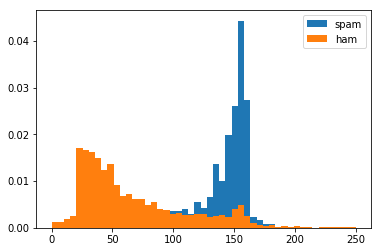

In [178]:
bins=np.linspace(0,250, 50)
pyplot.hist(data[data['label']=='spam']['msg_len'], bins, label='spam', normed=True)
pyplot.hist(data[data['label']=='ham']['msg_len'], bins, label='ham', normed=True)
pyplot.legend(loc='upper right')
pyplot.show()

### Plot Punctuation_% for spam And ham

C:\Users\Santosh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


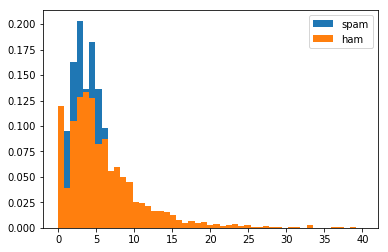

In [180]:
bins=np.linspace(0,40, 50)
pyplot.hist(data[data['label']=='spam']['punctuation_%'], bins, label='spam', normed=True)
pyplot.hist(data[data['label']=='ham']['punctuation_%'],bins, label='ham', normed=True)
pyplot.legend()
pyplot.show()

* Cant conclude much on punctuation as distubution of spam and ham are overlapped

# Power Transformations

### Transformations
* Changing each data point in a certain column to make the distribution look closer to a normal distribution
        => converting right/left skewed data to Normal/ Gaussian distribution 

### Common Transformations
#### 1. Tukey Transformation

* y=   X^lambda , lambda>0
    -> log(X) , lambda=0
    -> -(X)^lambda, lambda<0
    
#### 2. Box Cox Transformation 

* y= (X^lambda -1)/lambda, lambda!=0
   -> log(x),  lambda=0
   
### Transformation Process 
* Determine range of exponents to test 
* Apply transformations to each value of the chosen feature
* Determine which transformation yields best distribution, eg. plot histogram and pick which looks closer to a normal distribution

### Plot the new Features

In [181]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

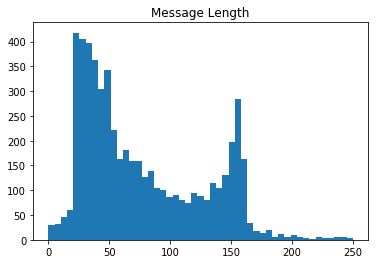

In [184]:
bins=np.linspace(0,250, 50)
plt.hist(data['msg_len'], bins)
plt.title('Message Length')
plt.show()

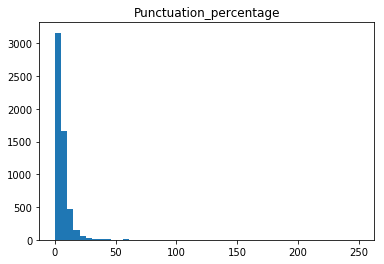

In [185]:
bins=np.linspace(0,250, 50)
plt.hist(data['punctuation_%'], bins)
plt.title('Punctuation_percentage')
plt.show()

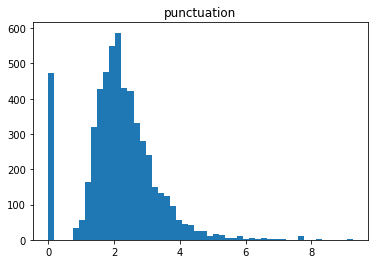

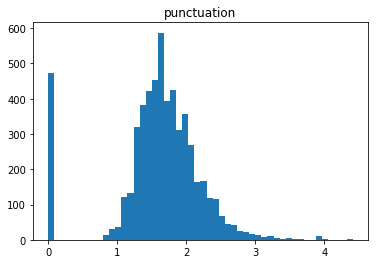

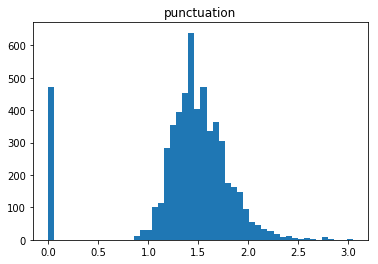

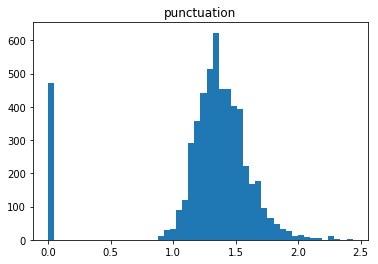

In [190]:
for i in [2,3,4,5]:
    plt.hist((data['punctuation_%'])**(1/i), bins=50)
    plt.title('punctuation')
    plt.show()

# Evaluate the Model : Accuracy, Recall, Precision